# Data Analysis of model performance  
Author: Amish Mishra  
Date: June 25, 2025  
Use `cder2` kernel  

In [1]:
import pandas
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from IPython.display import display

## Performance using CDER coordinates

In [2]:
# Load in the dataframe
cder_df = pandas.read_csv('perf_dataframes/cder_perf_df_downsample.csv')

print('----Downsample to as many unstable as stable proteins per topology----')

print('ROC-AUC stats')
tda_grouped_df= cder_df.groupby('topology').describe()['roc_auc_test']
display(tda_grouped_df)

print('APS stats')
tda_grouped_df= cder_df.groupby('topology').describe()['aps']
display(tda_grouped_df)

----Downsample to as many unstable as stable proteins per topology----
ROC-AUC stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.987961,0.003086,0.982833,0.986604,0.987626,0.990116,0.992940
EHEE,10.0,0.896356,0.016021,0.873865,0.884380,0.896329,0.900330,0.921659
HEEH,10.0,0.868576,0.057277,0.798611,0.812500,0.863715,0.913628,0.947917
HHH,10.0,0.801439,0.014197,0.782321,0.788889,0.802033,0.813173,0.820905


APS stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.986866,0.003861,0.980739,0.984378,0.986169,0.989411,0.993740
EHEE,10.0,0.901349,0.023872,0.853326,0.889139,0.905160,0.916840,0.932084
HEEH,10.0,0.830680,0.089472,0.692543,0.758214,0.841678,0.897060,0.952492
HHH,10.0,0.823556,0.019266,0.790022,0.813232,0.825679,0.840829,0.845604


## Performance using SME

In [3]:
# Load in the dataframe
sme_df = pandas.read_csv('perf_dataframes/sme_perf_df_downsample.csv')

print('----Downsample to as many unstable as stable proteins per topology----')

print('ROC-AUC stats')
sme_grouped_df= sme_df.groupby('topology').describe()['roc_auc_test']
display(sme_grouped_df)

print('APS stats')
sme_grouped_df= sme_df.groupby('topology').describe()['aps']
display(sme_grouped_df)

----Downsample to as many unstable as stable proteins per topology----
ROC-AUC stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.996191,0.002405,0.990710,0.995216,0.996730,0.997845,0.998662
EHEE,10.0,0.964955,0.010201,0.952801,0.955301,0.966290,0.968831,0.981564
HEEH,10.0,0.852951,0.051306,0.770833,0.812500,0.859375,0.877604,0.935764
HHH,10.0,0.882319,0.012705,0.861185,0.874362,0.883514,0.892473,0.896379


APS stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.996776,0.001877,0.992509,0.996266,0.997214,0.997953,0.998670
EHEE,10.0,0.968058,0.009562,0.954324,0.960104,0.968630,0.973643,0.984590
HEEH,10.0,0.836395,0.062499,0.718615,0.812873,0.829984,0.874347,0.948548
HHH,10.0,0.891944,0.010124,0.877503,0.883142,0.892119,0.898605,0.906022


## Mean Feature Importance for SME-only trained ML models

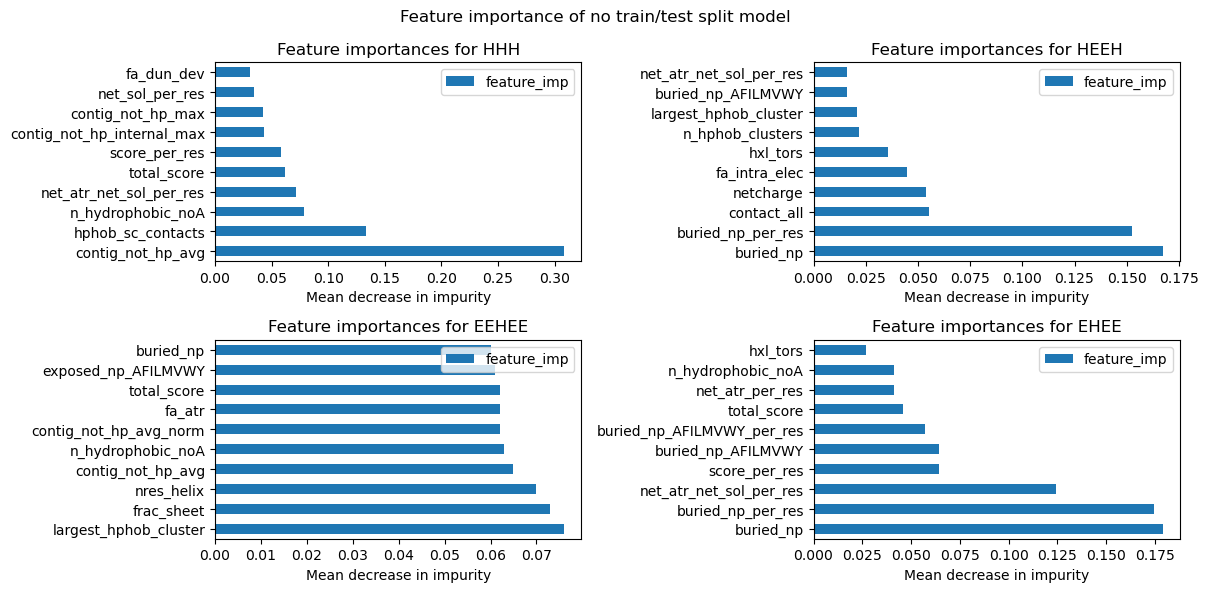

In [4]:
fig, axs = plt.subplots(2,2, figsize=(12,6))
plt.suptitle('Feature importance of no train/test split model')
top_arr = ['HHH', 'EEHEE', 'HEEH', 'EHEE']

for i, top in enumerate(top_arr):
    # Find the mean of the feature importances across all iterations
    features_df = pandas.read_csv(f'sme_feature_importances_dataframes/{top}_sme_feature_importances_no_train_test_split_df.csv', index_col=0)
    # Choose the largest
    largest_importances = features_df.nlargest(n=10, columns=['feature_imp'])

    # Plot
    j = 1 if i > 1 else 0
    i = i%2
    largest_importances.plot.barh(ax=axs[i][j], error_kw={'linewidth': 1, 'capsize': 2, 'capthick': 1})
    axs[i][j].set_title("Feature importances for "+top)
    axs[i][j].set_xlabel("Mean decrease in impurity")
    fig.tight_layout()
    
# fig.savefig('./figures/average_feature_importances.png')

## Performance using SME + CDER Features

In [5]:
# Load in the dataframe
sme_cder_df = pandas.read_csv('perf_dataframes/sme_cder_perf_df_downsample.csv')

print('----Downsample to as many unstable as stable proteins per topology----')

print('ROC-AUC stats')
sme_cder_grouped_df= sme_cder_df.groupby('topology').describe()['roc_auc_test']
display(sme_cder_grouped_df)

print('APS stats')
sme_cder_grouped_df= sme_cder_df.groupby('topology').describe()['aps']
display(sme_cder_grouped_df)

----Downsample to as many unstable as stable proteins per topology----
ROC-AUC stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.996704,0.001783,0.992494,0.996340,0.996600,0.997975,0.998662
EHEE,10.0,0.965368,0.010184,0.952909,0.955909,0.965885,0.970845,0.980590
HEEH,10.0,0.876389,0.060462,0.791667,0.837240,0.865451,0.926215,0.958333
HHH,10.0,0.882313,0.012597,0.861663,0.871778,0.884461,0.892078,0.897053


APS stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.997050,0.001677,0.992846,0.996766,0.997348,0.997972,0.998686
EHEE,10.0,0.968383,0.010017,0.955349,0.958676,0.969770,0.975100,0.983731
HEEH,10.0,0.864092,0.075277,0.730272,0.839031,0.853037,0.924877,0.971022
HHH,10.0,0.891604,0.009865,0.876392,0.884261,0.892972,0.896914,0.907493


## Compare model performances

In [6]:
summarized_df = pandas.concat([sme_grouped_df['50%'], tda_grouped_df['50%'], sme_cder_grouped_df['50%']], axis = 1)
summarized_df.columns = ['Median APS for SME based classifier', 'Median APS for CDER based classifier', 'Median APS for SME+CDER based classifier']
print('Performance of training on all stable and same number of unstable proteins for each topology')
summarized_df

Performance of training on all stable and same number of unstable proteins for each topology


,Median APS for SME based classifier,Median APS for CDER based classifier,Median APS for SME+CDER based classifier
topology,,,
EEHEE,0.997214,0.986169,0.997348
EHEE,0.968630,0.905160,0.969770
HEEH,0.829984,0.841678,0.853037
HHH,0.892119,0.825679,0.892972


In [7]:
# Prepare summary table for all topologies
topologies = ['HHH', 'HEEH', 'EHEE', 'EEHEE']
summary_rows = []

for topo in topologies:
    aps_sme = sme_df[sme_df['topology'] == topo]['aps'].reset_index(drop=True)
    aps_cder = cder_df[cder_df['topology'] == topo]['aps'].reset_index(drop=True)
    aps_sme_cder = sme_cder_df[sme_cder_df['topology'] == topo]['aps'].reset_index(drop=True)
    # Paired one-tailed t-test: H0: sme_df <= sme_cder_df, H1: sme_df > sme_cder_df
    one_t_stat, one_p_val = ttest_rel(aps_sme, aps_sme_cder, alternative='less')
    # Paired two-tailed t-test: H0: sme_df <= sme_cder_df, H1: sme_df > sme_cder_df
    two_t_stat, two_p_val = ttest_rel(aps_sme, aps_sme_cder, alternative='two-sided')
    summary_rows.append({
        'topology': topo,
        'mean_APS_SME': aps_sme.mean(),
        'std_APS_SME': aps_sme.std(),
        'mean_APS_CDER': aps_cder.mean(),
        'std_APS_CDER': aps_cder.std(),
        'mean_APS_SME+CDER': aps_sme_cder.mean(),
        'std_APS_SME+CDER': aps_sme_cder.std(),
        'one-sided p_value_SME_vs_SME+CDER': one_p_val,
        'two-sided p_value_SME_vs_SME+CDER': two_p_val
    })

summary_all = pandas.DataFrame(summary_rows).set_index('topology')
display(summary_all)

,mean_APS_SME,std_APS_SME,mean_APS_CDER,std_APS_CDER,mean_APS_SME+CDER,std_APS_SME+CDER,one-sided p_value_SME_vs_SME+CDER,two-sided p_value_SME_vs_SME+CDER
topology,,,,,,,,
HHH,0.891944,0.010124,0.823556,0.019266,0.891604,0.009865,0.657164,0.685673
HEEH,0.836395,0.062499,0.830680,0.089472,0.864092,0.075277,0.001475,0.002950
EHEE,0.968058,0.009562,0.901349,0.023872,0.968383,0.010017,0.272210,0.544420
EEHEE,0.996776,0.001877,0.986866,0.003861,0.997050,0.001677,0.051552,0.103104


## HEEH model improvement
Investigate the gain in HEEH model performance due to CDER features

In [8]:
heeh_cv_aps_sme_all_cder = pandas.read_csv('perf_dataframes/HEEH_cv_aps_scores_sme_and_all_cder.csv')
heeh_cv_aps_sme_only = pandas.read_csv('perf_dataframes/HEEH_cv_aps_scores_sme_only.csv')
heeh_cv_aps_sme_one_cder = pandas.read_csv('perf_dataframes/HEEH_cv_aps_scores_sme_with_one_cder_feature.csv')

In [15]:
# Calculate mean and std for each model
mean_sme_only = heeh_cv_aps_sme_only['all_sme_aps'].mean()
std_sme_only = heeh_cv_aps_sme_only['all_sme_aps'].std()

mean_sme_all_cder = heeh_cv_aps_sme_all_cder['sme_cder_aps'].mean()
std_sme_all_cder = heeh_cv_aps_sme_all_cder['sme_cder_aps'].std()

# Extract APS columns for one CDER features
aps_cols = [col for col in heeh_cv_aps_sme_one_cder.columns if col.endswith('_aps')]

# Extract APS column for SME only
aps_sme = heeh_cv_aps_sme_only['all_sme_aps']

# Create summary table
aps_summary = pandas.DataFrame({
    'Mean APS': [mean_sme_only, mean_sme_all_cder],
    'Std APS': [std_sme_only, std_sme_all_cder],
    'one-sided p-value vs SME only': [None, None],
    'two-sided p-value vs SME only': [None, None]
}, index=['SME only', 'SME + all CDER'])

# Add rows for each SME + one CDER feature
for col in aps_cols:
    mean_col = heeh_cv_aps_sme_one_cder[col].mean()
    std_col = heeh_cv_aps_sme_one_cder[col].std()
    aps_col = heeh_cv_aps_sme_one_cder[col]
    one_t_stat, one_p_val = ttest_rel(aps_sme, aps_col, alternative='less')
    two_t_stat, two_p_val = ttest_rel(aps_sme, aps_col, alternative='two-sided')
    aps_summary.loc[f'SME + one CDER ({col})'] = [
        mean_col, std_col, one_p_val, two_p_val
    ]

display(aps_summary)

,Mean APS,Std APS,one-sided p-value vs SME only,two-sided p-value vs SME only
SME only,0.841234,0.091522,NaN,NaN
SME + all CDER,0.848937,0.084390,NaN,NaN
SME + one CDER (H_0_green[-1.1]_aps),0.850100,0.081777,0.073998,0.147997
SME + one CDER (H_0_red[-1.24]_aps),0.838933,0.091783,0.698015,0.603970
SME + one CDER (H_0_green[-0.94]_aps),0.843335,0.085505,0.379691,0.759382
SME + one CDER (H_0_green[-1.21]_aps),0.847547,0.079879,0.260168,0.520337
SME + one CDER (H_1_green[0.69 0.24]_aps),0.850076,0.085703,0.094239,0.188478
SME + one CDER (H_1_red[-0.41 2.95]_aps),0.851720,0.083771,0.132957,0.265913
SME + one CDER (H_1_red[27.75 0.04]_aps),0.848609,0.085083,0.216078,0.432157
SME + one CDER (H_1_green[11.89 0.13]_aps),0.834139,0.090150,0.775210,0.449580
